# Homework-4
### Course: INSY 5336 001 - Python Programming (Spring 2022)
### Name: Mohit Kumar Dundu
### UTA ID: 1002011177

## Question: Find the current Gold,Silver and Crude Oil prices using web scraping

## Algorithm:
1. Start by importing the required modules like BeautifulSoup,requests and sqlite3
2. Initiate a try block to handle network connectivity issues
3. Open the commodities web URL in the backend using Requests
4. Parse the HTML content of the page using BeautifulSoup module
5. Fetch the text value of the gold price using 'data symbol' of the 'fin-streamer' attribute
6. Fetch the text value of the crude oil price using 'data symbol' of the 'fin-streamer' attribute
7. Fetch the text value of the silver price using 'data symbol' of the 'fin-streamer' attribute
8. Convert all the above values into float and append into a list
9. Create a new file 'commodity_prices.txt'
10. Write all the commodities and their prices in the text file
11. Close the file after writing data
12. Print the above values on the screen
13. Create a new connection and cursor to SQLite DB
14. Create a new file 'CommodityDatabase.db'
15. Drop the table 'CommodityTable' if it exists in the DB
16. Create a table with the columns as Ticker, Price and their datatypes being TEXT,REAL
17. Insert the commodities and their prices in the CommodityTable.
18. Save the table using commit
19. Close the cursor and the connection to the DB
20. Catch the exception if there is any, in the except block
21. End the program.

## Instructions for running the program:
- Make sure the system is connected to the internet since we are about to scrape online data.
- No user input need to be provided. Simply run the program.

## Expected results:
- Prices of Gold, Crude Oil and Silver at the time of program execution are fetched from the web url provided.
- Two files are created in the directory where the python file exists and is executed. 
    - First file is the text file, which contains the prices of Gold,Silver,Crude Oil in different lines of the file
    - Second file created is the .db file which contains the table having the commodities and their prices
- Example:
    - Sample output printed on screen: Gold:1,898.50 ... Crude:104.95 ... Silver:23.25
    - Sample output in the .txt file: Gold Value for today is: 1,898.50\n Crude Value for today is: 104.95\n Silver Value for today is: 23.25
    - Sample table output in the .db file: 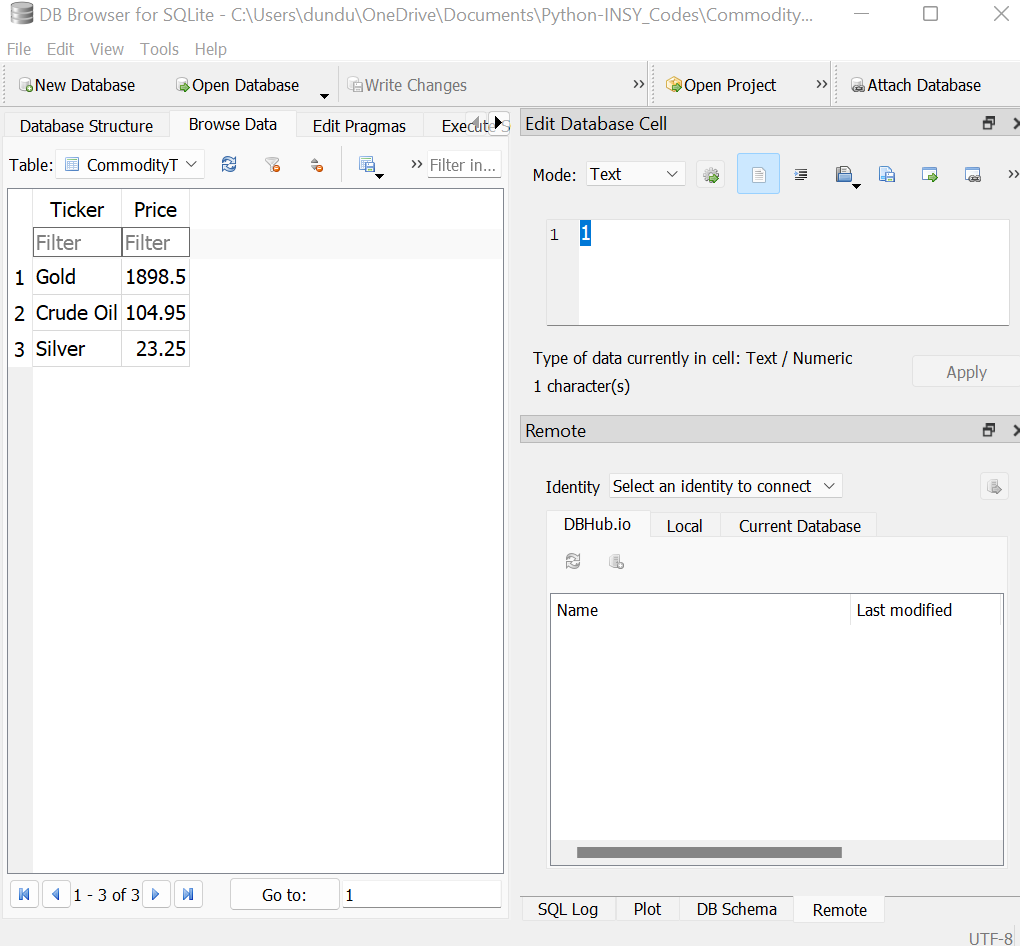

In [8]:
# Importing requests to access the web URL
# Importing BeautifulSoup for web scraping
import requests
from bs4 import BeautifulSoup
# Importing SQLite to update table in a database
import sqlite3
# Try except block to handle exceptions
try:
    # Storing the web url in a variable
    web_url = 'https://finance.yahoo.com/commodities'
    # Loading the web page using 'get' in the backend
    web_obj = requests.get(web_url)
    # Parsing html of the web page using BeautifulSoup
    web_html = BeautifulSoup(web_obj.content, "html.parser")
    # Fetching the value of the gold price using 'data symbol' of the 'fin-streamer' attribute
    # gold_value is a string that contains the values of the below html attribute
    gold_value = web_html.find_all("fin-streamer", attrs = {"data-symbol":"GC=F"})
    # Creating an empty list to append all the prices later
    lst = []
    # Creating a text file to write the values of gold,silver and crude
    file = open("commodity_prices.txt",'w')
    # Iterating word by word in the above string
    for i in gold_value:
        # Fetching just the price value of gold by converting the html using .text
        lst.append(i.text)
        # i.text gives a string value which has the price separated by commas as per the numeric system
        # Replacing the comma in the string with blank character
        g = i.text.replace(',','')
        # Converting the string value to float to update it in the database as a Numeric character
        gold_price = float(g)
        # Creating a string to write this value in the file
        gold_val = "Gold Value for today is: "+i.text
        # Writing the above string on the file created earlier
        file.write(gold_val)
        # Breaking the loop after fetching the gold price
        break
    # Fetching the value of the Crude Oil price using 'data symbol' of the 'fin-streamer' attribute
    # crude_value is a string that contains the values of the below html attribute
    crude_value = web_html.find_all("fin-streamer", attrs = {"data-symbol":"CL=F"})
    # Following the same procedure for Crude Oil just like Gold
    for i in crude_value:
        lst.append(i.text)
        c = i.text.replace(',','')
        crude_price = float(c)
        crude_val = "\nCrude Value for today is: "+i.text
        file.write(crude_val)
        break
    # Fetching the value of the Silver price using 'data symbol' of the 'fin-streamer' attribute
    # silver_value is a string that contains the values of the below html attribute
    silver_value = web_html.find_all("fin-streamer", attrs = {"data-symbol":"SI=F"})
    # Following the same procedure for Silver just like Gold and Crude Oil
    for i in silver_value:
        lst.append(i.text)
        s = i.text.replace(',','')
        silver_price = float(s)
        silver_val = "\nSilver Value for today is: "+i.text
        file.write(silver_val)
        break
    # Printing the values of Gold,Crude Oil and Silver in that order
    print("Gold:"+lst[0]+" *** Crude:"+lst[1] +" *** Silver:"+lst[2])
    # Closing the file after writing the data into it
    file.close()
    # Creating a new connection for a new database file "CommodityDatabase.db"
    conn = sqlite3.connect('CommodityDatabase.db')
    # Creating a list with the commodities and their prices
    prices = [('Gold', gold_price), ('Crude Oil', crude_price), ('Silver', silver_price)]
    # Creating a cursor to maintain the connection to the database at all times
    cur = conn.cursor()
    # Dropping the table if it already exists
    cur.execute('DROP TABLE IF EXISTS CommodityTable')
    # Creating a table with the columns as Ticker, Price and their datatypes being TEXT,REAL
    cur.execute('CREATE TABLE CommodityTable (Ticker TEXT, Price REAL)')
    # Inserting values from the list created above to our database file
    cur.executemany('INSERT INTO CommodityTable (Ticker, Price) VALUES(?,?);', prices)
    # Saving the table using the 'commit' command
    conn.commit()
    # CLosing the cursor to the database
    cur.close()
    # Closing the connection to the database
    conn.close()
except:
    # Catching the exception if there is any error connecting to the website
    print("Error connecting to the website, please check your network connection.")

Gold:1,905.60 *** Crude:105.03 *** Silver:23.36
